# LIBRARIES 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

In [ ]:
print("Sample of the Titanic dataset:")
print(df.head())
print("\nInformation about the dataset:")
print(df.info())
print("\nStatistical summary of the dataset:")
print(df.describe())
print("\nMissing values in the dataset:")
print(df.isnull().sum())

Sample of the Titanic dataset:
   PassengerId  Survived
0          892         0
1          893         1
2          894         0
3          895         0
4          896         1

Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB
None

Statistical summary of the dataset:
       PassengerId    Survived
count   418.000000  418.000000
mean   1100.500000    0.363636
std     120.810458    0.481622
min     892.000000    0.000000
25%     996.250000    0.000000
50%    1100.500000    0.000000
75%    1204.750000    1.000000
max    1309.000000    1.000000

Missing values in the dataset:
PassengerId    0
Survived       0
dtype: int64


In [ ]:
df.fillna(df.mean(), inplace=True)

In [ ]:
X = df.drop(['Survived'], axis=1)
y = df['Survived']
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# LOGISTIC REGRESSION 

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
print("\nLogistic Regression Model Accuracy:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))


Logistic Regression Model Accuracy: 0.5952380952380952
              precision    recall  f1-score   support

           0       0.60      1.00      0.75        50
           1       0.00      0.00      0.00        34

    accuracy                           0.60        84
   macro avg       0.30      0.50      0.37        84
weighted avg       0.35      0.60      0.44        84



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# SVM MODEL


In [ ]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print("\nSupport Vector Machine (SVM) Accuracy:", accuracy_score(y_test, svm_pred))
print(classification_report(y_test, svm_pred))


Support Vector Machine (SVM) Accuracy: 0.5952380952380952
              precision    recall  f1-score   support

           0       0.60      1.00      0.75        50
           1       0.00      0.00      0.00        34

    accuracy                           0.60        84
   macro avg       0.30      0.50      0.37        84
weighted avg       0.35      0.60      0.44        84



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#  Decision tree

In [ ]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
print("\nDecision Tree Model Accuracy:", accuracy_score(y_test, dt_pred))
print(classification_report(y_test, dt_pred))


Decision Tree Model Accuracy: 0.5238095238095238
              precision    recall  f1-score   support

           0       0.59      0.68      0.63        50
           1       0.38      0.29      0.33        34

    accuracy                           0.52        84
   macro avg       0.49      0.49      0.48        84
weighted avg       0.50      0.52      0.51        84



In [ ]:
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly']}
svm_grid = GridSearchCV(SVC(), param_grid, cv=3)
svm_grid.fit(X_train, y_train)
print("\nBest Hyperparameters for SVM:", svm_grid.best_params_)
best_svm_model = svm_grid.best_estimator_
best_svm_pred = best_svm_model.predict(X_test)
print("\nTuned SVM Model Accuracy:", accuracy_score(y_test, best_svm_pred))
print(classification_report(y_test, best_svm_pred))


Best Hyperparameters for SVM: {'C': 0.1, 'kernel': 'linear'}

Tuned SVM Model Accuracy: 0.5952380952380952
              precision    recall  f1-score   support

           0       0.60      1.00      0.75        50
           1       0.00      0.00      0.00        34

    accuracy                           0.60        84
   macro avg       0.30      0.50      0.37        84
weighted avg       0.35      0.60      0.44        84



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


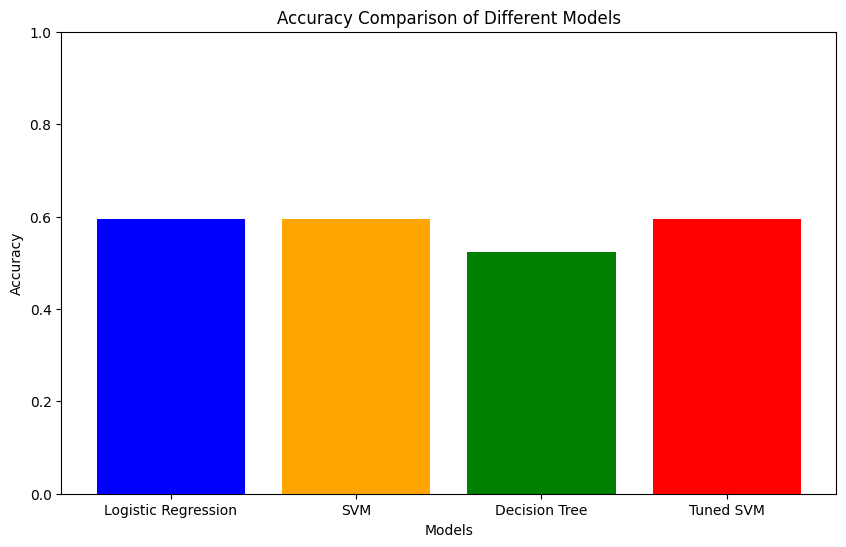

In [ ]:
import matplotlib.pyplot as plt
models = ['Logistic Regression', 'SVM', 'Decision Tree', 'Tuned SVM']
accuracies = [accuracy_score(y_test, lr_pred), accuracy_score(y_test, svm_pred),
              accuracy_score(y_test, dt_pred), accuracy_score(y_test, best_svm_pred)]

plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'orange', 'green', 'red'])
plt.title('Accuracy Comparison of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.0, 1.0)
plt.show()